Import 60,000 digits and 10,000 test digits

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

3 index: 52085


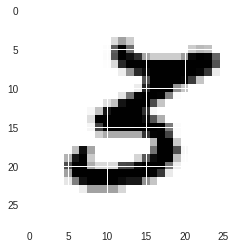

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 52_085 #any number up to 59,999
print(y_train[image_index], 'index:', image_index)
plt.imshow(x_train[image_index], cmap='Greys');

Create train and test data

In [5]:
n_images_train = x_train.shape[0]
n_images_test = x_test.shape[0]

x_train = x_train.reshape(n_images_train, 28, 28, 1)
x_test = x_test.reshape(n_images_test, 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(n_images_train, 'images in x_train')
print(n_images_test, 'images in x_test')

x_train shape: (60000, 28, 28, 1)
60000 images in x_train
10000 images in x_test


Create 8-layer model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'multi-layer model built'

'multi-layer model built'

Fit data

In [8]:
model.fit(x=x_train, y=y_train, epochs=5);

Epoch 1/5
60000/60000 [==============================] - 21s 351us/step - loss: 0.1237 - acc: 0.9630
Epoch 2/5
60000/60000 [==============================] - 17s 284us/step - loss: 0.0558 - acc: 0.9833
Epoch 3/5
60000/60000 [==============================] - 17s 284us/step - loss: 0.0437 - acc: 0.9871
Epoch 4/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0406 - acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 17s 284us/step - loss: 0.0335 - acc: 0.9908


Find accuracy... 98.66%! Very good!

In [9]:
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print(f"Mean squared error (MSE) for test data: {test_error_rate}")

Mean squared error (MSE) for test data: [0.0567815843290271, 0.9866]


In [0]:
model.save("trained_model.h5")

In [0]:
import keras.models
model_loaded = keras.models.load_model("trained_model.h5")

Test a random image... predicted was 9, which is correct!

Predicted value 9 [[3.7678093e-17 6.2657209e-14 2.0932548e-12 9.7262103e-12 1.5166215e-08
  2.5366988e-14 7.2514276e-18 1.0395909e-06 2.0820332e-07 9.9999869e-01]]


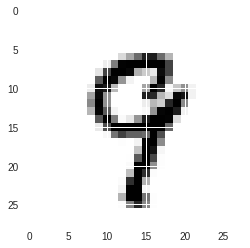

In [12]:
image_index = 3666

plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model_loaded.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted value", pred.argmax(), pred)

One cool thing I found on the web about neural networks is related to cancer research. Neural networks are encouraging new kinds of cancer research. Neural networks are helping cure cancers with "the ability to wield massive collections of information and establish a path forward."

link: https://artificial-future.com/convolutional-neural-network/